## Importamos las bibliotecas necesarias

In [19]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

### Leemos los datos históricos de BTC desde un archivo CSV 

muetra las primeras 5 filas

In [20]:
# Ruta hacia el archivo CSV
ruta_archivo = "C:/Users/SILCA/OneDrive/Escritorio/dataset/BTC-USD.csv" 

# Cargar los datos en un DataFrame
df = pd.read_csv(ruta_archivo)

print(df.head())

     Fecha  Precio_Apertura  Precio_Máximo  Precio_Mínimo  Precio_Cierre  \
0  21/3/16        413417999      413417999      410381012      413307007   
1  22/3/16        413131989      418375000      412531006      418088989   
2  23/3/16        418161011      419268005      417364014      418040985   
3  24/3/16        418424011      418679993      415485992      416394012   
4  25/3/16        416507996      418079987      415558014      417177002   

    Volumen  
0  61655400  
1  66813300  
2  61444200  
3  68346704  
4  52560000  


### imprimo el Dataframe

In [21]:
# Ruta hacia el archivo C
ruta_archivo = "C:/Users/SILCA/OneDrive/Escritorio/dataset/BTC-USD.csv"

# Cargar los datos en un DataFrame
df = pd.read_csv(ruta_archivo)
print(df)

        Fecha  Precio_Apertura  Precio_Máximo  Precio_Mínimo  Precio_Cierre  \
0     21/3/16        413417999      413417999      410381012      413307007   
1     22/3/16        413131989      418375000      412531006      418088989   
2     23/3/16        418161011      419268005      417364014      418040985   
3     24/3/16        418424011      418679993      415485992      416394012   
4     25/3/16        416507996      418079987      415558014      417177002   
...       ...              ...            ...            ...            ...   
2855  16/1/24      42499335938    43566273438    42085996094    43154945313   
2856  17/1/24      43132101563    43189890625    42189308594    42742652344   
2857  18/1/24      42742312500    42876347656    40631171875    41262058594   
2858  19/1/24      41278460938    42134160156    40297457031    41618406250   
2859  21/1/24      41671488281    41693160156    41615140625    41623695313   

          Volumen  
0        61655400  
1        66

### Imprimimos las columnas para verificar si se cambiaron los nombres 

In [22]:
df.columns

Index(['Fecha', 'Precio_Apertura', 'Precio_Máximo', 'Precio_Mínimo',
       'Precio_Cierre', 'Volumen'],
      dtype='object')

### df contiene las columnas 'Precio_Cierre' y 'Precio_Apertura'
### Preparamos los datos, los dividimos en x, y


In [23]:
X = df['Precio_Cierre'].values.reshape(-1, 1)
y = df['Precio_Apertura'].values  # Cambia 'Fecha' por la columna numérica adecuada


### Dividimos en conjuntos de entrenamiento y prueba

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creamos una instancia del modelo

In [25]:
model = LinearRegression()


### Entrenamos el modelo

In [26]:
model.fit(X_train, y_train)


LinearRegression()

### Realizamos predicciones en los datos de prueba

In [27]:
y_pred = model.predict(X_test)


### Visualizamps los resultados

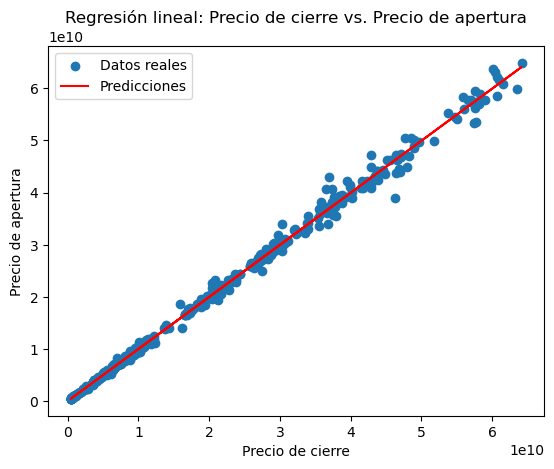

In [28]:
plt.scatter(X_test, y_test, label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Precio de cierre')
plt.ylabel('Precio de apertura')  # Cambia la etiqueta según la columna objetivo
plt.title('Regresión lineal: Precio de cierre vs. Precio de apertura')
plt.legend()
plt.show()


#### En el gráfico, se comparan el volumen con el precio de cierre del modelo de fregrecion lineal.

Los puntos azules representan una combinación de volumen y precio de cierre real. Estos puntos están distribuidos en el gráfico según los datos reales del conjunto de prueba. La línea roja representa las predicciones del modelo de regresión lineal. Esta línea muestra cómo el modelo estima el volumen en función del precio de cierre. Si los puntos azules están cerca de esta línea, significa que el modelo está haciendo buenas predicciones. Si hay una gran dispersión entre los puntos y la línea, podría ser necesario investigar más o ajustar el modelo.
Parece haber una relación positiva entre el volumen y el precio de cierre. A medida que el volumen aumenta, también lo hace el precio de cierre.

### Reemplazamos fecha_apertura por volumen, para ver si habia correlacion

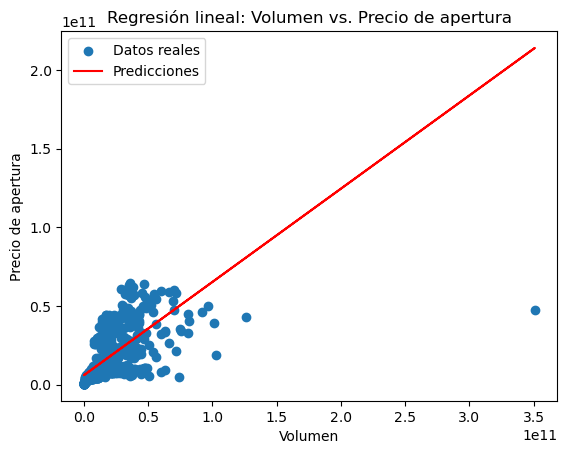

In [31]:


X = df['Volumen'].values.reshape(-1, 1)
y = df['Precio_Apertura'].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Volumen')
plt.ylabel('Precio de apertura') 
plt.title('Regresión lineal: Volumen vs. Precio de apertura')
plt.legend()
plt.show()


##### En el gráfico, se comparan las predicciones del modelo de regresión lineal con los valores reales para la variable “Volumen” frente al “Precio de cierre”. 
Los puntos azules, representan un valor real de volumen y precio de cierre. Estos puntos se distribuyen en el gráfico según los datos reales del conjunto de prueba.La línea roja muestra las predicciones del modelo de regresión lineal. Esta línea representa cómo el modelo estima el volumen en función del precio de cierre. Si los puntos azules están cerca de esta línea, significa que el modelo está haciendo buenas predicciones. Si hay una gran dispersión entre los puntos y la línea, podría ser necesario ajustar el modelo o considerar otras características para mejorar la precisión.